In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData
from os import mkdir
from os.path import isdir, join

import seaborn as sns
import itertools

chain = lambda vec, factor: list(itertools.chain.from_iterable([[x] * factor for x in vec]))

In [2]:
if not isdir('monocyte_fig'):
    mkdir('monocyte_fig')

C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == "__main__":
C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and wi

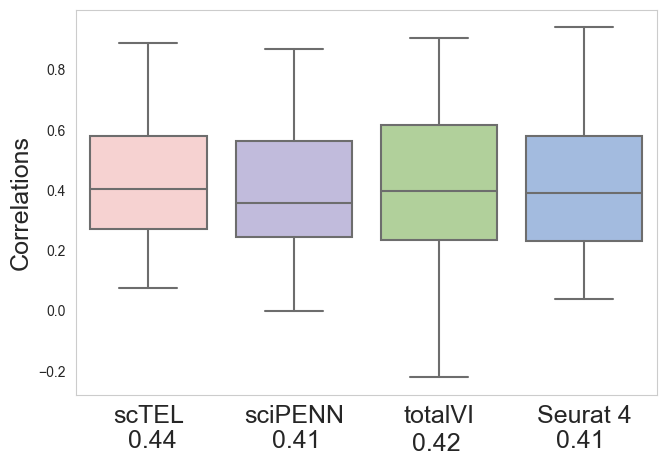

In [69]:
corrs = {'scTEL': pd.read_csv('corrs_results/sctel_monocyte.csv', index_col = 0), 'sciPENN': pd.read_csv('corrs_results/scipenn_monocyte.csv', index_col = 0), 'totalVI': pd.read_csv('corrs_results/totalvi_monocyte.csv', index_col = 0), 'Seurat 4': pd.read_csv('corrs_results/seurat4_monocytetomonocyte.csv', index_col = 0)}
corrs['Seurat 4'].index = [x if x != 'HLA-DR-DP-DQ' else 'HLA-DR_DP_DQ' for x in corrs['Seurat 4'].index]
index = pd.read_csv('corrs_results/scipenn_monocyte.csv', index_col = 0).index

corrs = {key: corrs[key].loc[index] for key in corrs}

sctel_corrs = corrs['scTEL'].mean(axis = 1)[:, None]
scipen_corrs = corrs['sciPENN'].mean(axis = 1)[:, None]
totalvi_corrs = corrs['totalVI'].mean(axis = 1)[:, None]
seurat4_corrs = corrs['Seurat 4'].mean(axis = 1)[:, None]

q = len(scipen_corrs)

data = pd.DataFrame(np.concatenate((sctel_corrs, scipen_corrs, totalvi_corrs, seurat4_corrs), axis = 1), columns = corrs.keys())

fig, ax = plt.subplots(1, 1, figsize = (7.5, 5))
sns.boxplot(ax = ax, data = data, palette = ["#fccccb", "#bdb5e1", "#b0d992", "#99b9e9"])
mean_corrs = [x.mean() for x in [sctel_corrs, scipen_corrs, totalvi_corrs, seurat4_corrs]]
ax.grid(False)
ax.set_title(f"{mean_corrs[0]:.2f}", loc='left', x=0.09, y=- 0.15, size=12)
ax.set_title(f"{mean_corrs[1]:.2f}", x=0.38, y=- 0.15, size=12)
ax.set_xlabel(f"{mean_corrs[2]:.2f}", x=0.62, y=- 0.01, size=12)
ax.set_title(f"{mean_corrs[3]:.2f}", x=0.91, y=- 0.15, loc='right', size=12)

ax.set_ylabel('Correlations', size=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
ax.figure.savefig('pbmch1n1_fig/corrplot3.png', dpi=300)


# ax.set_ylabel('Correlations')
ax.figure.savefig('monocyte_fig/corrplot.png', dpi=600)

C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == "__main__":
C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and wi

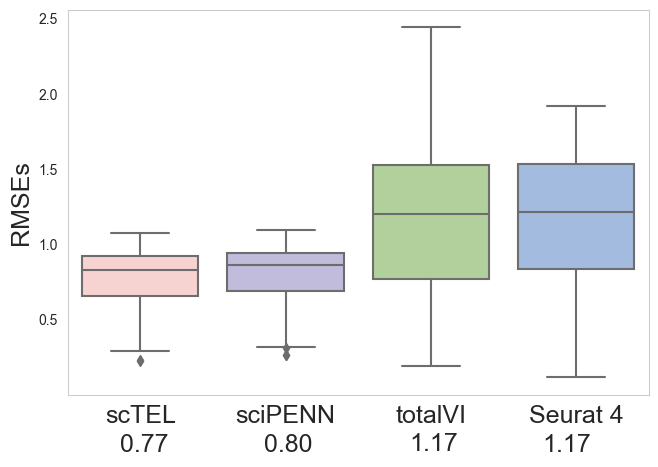

In [68]:
mses = {'scTEL': pd.read_csv('mse_results/sctel_monocyte.csv', index_col = 0), 'sciPENN': pd.read_csv('mse_results/scipenn_monocyte.csv', index_col = 0), 'totalVI': pd.read_csv('mse_results/totalvi_monocyte.csv', index_col = 0), 'Seurat 4': pd.read_csv('mse_results/seurat4_monocytetomonocyte.csv', index_col = 0)}
mses['Seurat 4'].index = [x if x != 'HLA-DR-DP-DQ' else 'HLA-DR_DP_DQ' for x in mses['Seurat 4'].index]
index = pd.read_csv('mse_results/scipenn_monocyte.csv', index_col = 0).index

mses = {key: mses[key].loc[index] for key in mses}

sctel_mses = mses['scTEL'].mean(axis = 1)[:, None]
scipen_mses = mses['sciPENN'].mean(axis = 1)[:, None]
totalvi_mses = mses['totalVI'].mean(axis = 1)[:, None]
seurat4_mses = mses['Seurat 4'].mean(axis = 1)[:, None]

data = pd.DataFrame(np.concatenate((sctel_mses, scipen_mses, totalvi_mses, seurat4_mses), axis = 1), columns = mses.keys())

fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))
sns.boxplot(ax=ax, data=data, palette=["#fccccb", "#bdb5e1", "#b0d992", "#99b9e9"])
mean_mses = [float(x.mean()) for x in [ sctel_mses, scipen_mses, totalvi_mses, seurat4_mses]]

ax.grid(False)
ax.set_title(f"{mean_mses[0]:.2f}", loc='left', x=0.09, y=- 0.15, size=12)
ax.set_title(f"{mean_mses[1]:.2f}", x=0.38, y=- 0.15, size=12)
ax.set_xlabel(f"{mean_mses[2]:.2f}", x=0.63, y=- 0.06, size=12)
ax.set_title(f"{mean_mses[3]:.2f}", x=0.90, y=- 0.15, loc='right', size=12)
ax.set_ylabel('RMSEs', size=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)

ax.figure.savefig('monocyte_fig/mseplot.png', dpi=600)

In [2]:
sctel_embedding = sc.read('sctel_monocyteembedding.h5ad')
sc.pp.pca(sctel_embedding, n_comps = 20)
sc.pp.neighbors(sctel_embedding, n_pcs = 20)
sc.tl.umap(sctel_embedding)
batch_map = {cell: 'Monocyte 1' if name[:4] == 'DS-1' else 'Monocyte 2' for cell, name in zip(sctel_embedding.obs.index, sctel_embedding.obs['batch'])}
sctel_embedding = pd.DataFrame(sctel_embedding.obsm['X_umap'], index = sctel_embedding.obs.index)
sctel_embedding['Batch'] = [batch_map[cell] for cell in sctel_embedding.index]
sctel_embedding = sctel_embedding.groupby('Batch')

In [3]:
scipenn_embedding = sc.read('scipenn_monocyteembedding.h5ad')

sc.pp.pca(scipenn_embedding, n_comps = 20)
sc.pp.neighbors(scipenn_embedding, n_pcs = 20)
sc.tl.umap(scipenn_embedding)
batch_map = {cell: 'Monocyte 1' if name[:4] == 'DS-1' else 'Monocyte 2' for cell, name in zip(scipenn_embedding.obs.index, scipenn_embedding.obs['batch'])}
scipenn_embedding = pd.DataFrame(scipenn_embedding.obsm['X_umap'], index = scipenn_embedding.obs.index)
scipenn_embedding['Batch'] = [batch_map[cell] for cell in scipenn_embedding.index]
scipenn_embedding = scipenn_embedding.groupby('Batch')

In [4]:
totalvi_embedding = pd.read_csv('totalvi_monocyteembedding.csv', index_col = 0)
idx = totalvi_embedding.index
totalvi_embedding = AnnData(totalvi_embedding)
totalvi_embedding.obs.index = idx 

sc.pp.neighbors(totalvi_embedding, n_pcs = 0, use_rep = None)
sc.tl.umap(totalvi_embedding)

totalvi_embedding = pd.DataFrame(totalvi_embedding.obsm['X_umap'], index = totalvi_embedding.obs.index)
totalvi_embedding['Batch'] = [batch_map[cell] for cell in totalvi_embedding.index]
totalvi_embedding = totalvi_embedding.groupby('Batch')

C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
seurat_trainumap = pd.read_csv("monocytetomonocyte_trainumap.csv", index_col = 0)
seurat_testumap = pd.read_csv("monocytetomonocyte_testumap.csv", index_col = 0)
seurat_testumap.columns = ["UMAP_1", "UMAP_2"]
seurat_umap = pd.concat((seurat_trainumap, seurat_testumap), axis = 0)

seurat_umap['Batch'] = [batch_map[cell] for cell in seurat_umap.index]
seurat_umap = seurat_umap.groupby('Batch')

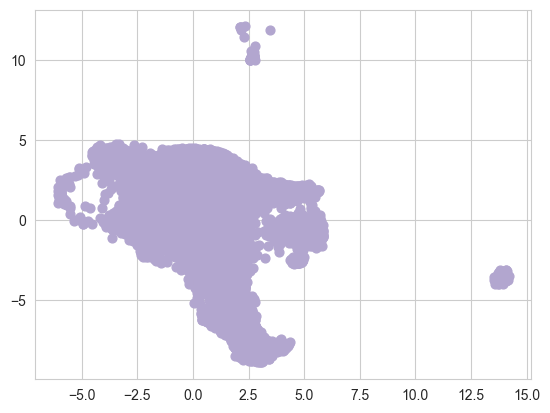

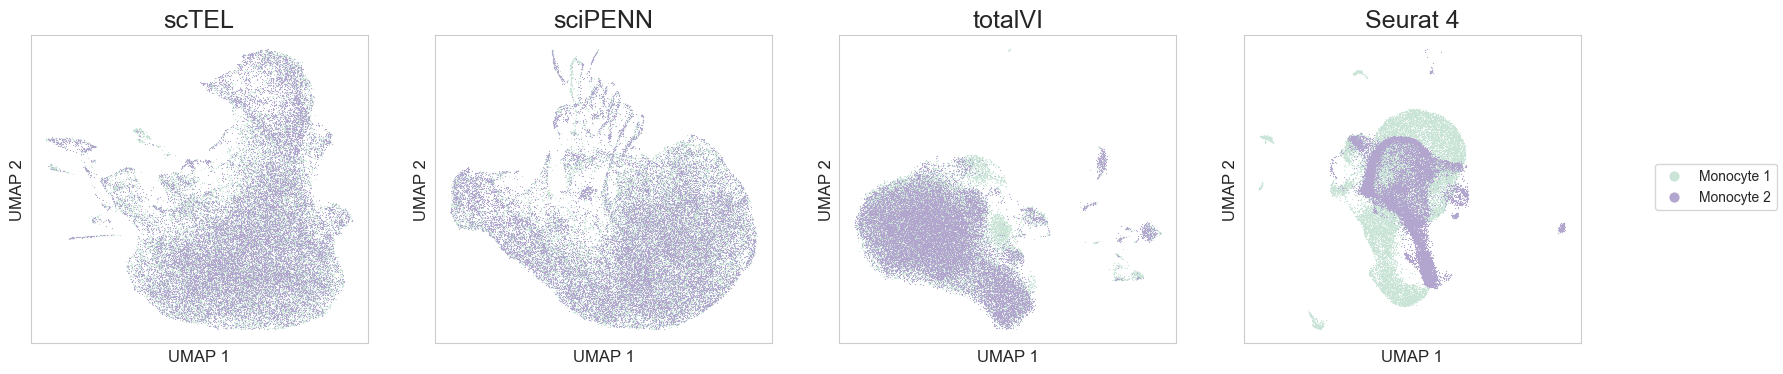

In [6]:
_, ax =  plt.subplots(1)
f, axs = plt.subplots(1, 4, figsize = (20, 4))

names = ['Monocyte 1', 'Monocyte 2']
colormap = {'Monocyte 1': '#cae4d7', 'Monocyte 2': '#b2a6cf'}

def customize_axes(ax, name):
    ax.set_title(name, size = 15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('UMAP 1', size = 12)
    ax.set_ylabel('UMAP 2', size = 12)

method_names = ['scTEL', 'sciPENN', 'totalVI', 'Seurat 4']
[customize_axes(ax, name) for ax, name in zip(axs, method_names)]

for name in names:
    group = sctel_embedding.get_group(name)
    axs[0].scatter(group[0], group[1], linewidth = 0, s = 3, marker = '.', label = name, c = colormap[name])

    group = scipenn_embedding.get_group(name)
    axs[1].scatter(group[0], group[1], linewidth = 0, s = 3, marker = '.', label = name, c = colormap[name])

    group = totalvi_embedding.get_group(name)
    axs[2].scatter(group[0], group[1], linewidth = 0, s = 3, marker = '.', label = name, c = colormap[name])

    group = seurat_umap.get_group(name)
    axs[3].scatter(group['UMAP_1'], group['UMAP_2'], linewidths = 0, s = 3, marker = '.', label = name, c = colormap[name])
    group = seurat_umap.get_group(name)
    axs[3].scatter(group['umap_1'], group['umap_2'], linewidths = 0, s = 3, marker = '.', label = name, c = colormap[name])

    ax.scatter(group['UMAP_1'], group['UMAP_2'], label = name, c = colormap[name], s = 40)
    # ax.scatter(group['umap_1'], group['umap_2'], label = name, c = colormap[name], s = 40)

Line, Label = ax.get_legend_handles_labels()
f.legend(Line, Label, loc = 'center right')
f.savefig('monocyte_fig/embeddings.png', dpi = 600)

In [28]:
sctel = sc.read("sctel_monocytefeatures.h5ad")
sctel_features = AnnData(sctel.layers['imputed'])
sctel_features.var.index, sctel_features.obs.index = sctel.var.index, sctel.obs.index

truth = AnnData(sctel.X)
truth.var.index, truth.obs.index = sctel.var.index, sctel.obs.index

In [29]:
scipenn = sc.read("scipenn_monocytefeatures.h5ad")
scipenn_features = AnnData(scipenn.layers['imputed'])
scipenn_features.var.index, scipenn_features.obs.index = scipenn.var.index, scipenn.obs.index


In [30]:
totalvi_features = pd.read_csv("totalvi_monocytefeatures.csv", index_col = 0)
features, indices = totalvi_features.columns, totalvi_features.index
totalvi_features = AnnData(totalvi_features)
totalvi_features.var.index, totalvi_features.obs.index = features, indices

C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
seurat4_features = pd.read_csv("seurat_monocytetomonocytefeatures.csv", index_col = 0).T
features, indices = seurat4_features.columns, seurat4_features.index
seurat4_features = AnnData(seurat4_features)
seurat4_features.var.index, seurat4_features.obs.index = features, indices

C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
datasets = {'truth': truth, 'scTEL': sctel_features, 'sciPENN': scipenn_features, 'totalVI': totalvi_features, 'Seurat 4': seurat4_features}

sc.pp.neighbors(truth, n_pcs = 0, use_rep = None)
sc.tl.umap(truth)
x, y = truth.obsm['X_umap'].T

In [ ]:
proteins = ['CD14', 'CD16', 'CD303']

f, axs = plt.subplots(5, len(proteins), figsize = (10, 10))
idx = -1

for name in datasets:
    dataset = datasets[name]
    
    idx += 1
    for i, prot in enumerate(proteins):
        expr = dataset[:, prot].X[:, 0]
        expr = (expr - np.min(expr))/(np.max(expr) - np.min(expr))
        
        
        axs[idx, i].scatter(x, y, c = expr, marker='.', s=2, linewidths=0, cmap = 'YlGnBu')
        axs[idx, i].set_xticks([])
        axs[idx, i].set_yticks([])
        
        if not idx:
            axs[idx, i].set_title(prot, size = 14)
        else:
            axs[idx, i].set_title(f"{mses[name].loc[prot].mean():.2f}", loc = 'right', x = 0.98, y = 0.85, size = 12)

        if not i:
            axs[idx, i].set_ylabel(name, size = 11)
            
PCM = axs[idx, i].get_children()[0]

cb_ax = f.add_axes([0.92, 0.1, 0.01, 0.8])
cbar = f.colorbar(PCM, cax=cb_ax)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0., hspace  = 0.)

f.savefig('monocyte_fig/fplots.png', dpi = 600)

In [60]:
base_path = 'totalVI_quantiles_monocyte'

q10 = pd.read_csv(join(base_path, 'q10.csv'), index_col = 0)
q25 = pd.read_csv(join(base_path, 'q25.csv'), index_col = 0)
q75 = pd.read_csv(join(base_path, 'q75.csv'), index_col = 0)
q90 = pd.read_csv(join(base_path, 'q90.csv'), index_col = 0)

truth = pd.read_csv(join(base_path, 'truth.csv'), index_col = 0)

Index(['Beta2-microglobulin', 'CCR10', 'CD101', 'CD102', 'CD107a', 'CD109',
       'CD110', 'CD112', 'CD115', 'CD116', 'CD119', 'CD11a', 'CD11b', 'CD11c',
       'CD123', 'CD126', 'CD13', 'CD131', 'CD14', 'CD141', 'CD151', 'CD155',
       'CD16', 'CD162', 'CD163', 'CD164', 'CD169', 'CD18', 'CD192', 'CD195'],
      dtype='object')

In [ ]:
totalVI_coverage50 = (q75.to_numpy() > truth.to_numpy())*(q25.to_numpy() < truth.to_numpy())
totalVI_coverage50 = totalVI_coverage50.mean(axis = 0)

In [13]:
scipenn_coverage50 = (scipenn.layers['q75'] > truth.to_numpy()) * (scipenn.layers['q25'] < truth.to_numpy())
scipenn_coverage50 = scipenn_coverage50.mean(axis = 0)

In [14]:
sctel_coverage50 = (sctel.layers['q75'] > truth.to_numpy()) * (sctel.layers['q25'] < truth.to_numpy())
sctel_coverage50 = sctel_coverage50.mean(axis = 0)

In [15]:
totalVI_coverage80 = (q90.to_numpy() > truth.to_numpy())*(q10.to_numpy() < truth.to_numpy())
totalVI_coverage80 = totalVI_coverage80.mean(axis = 0)

In [16]:
scipenn_coverage80 = (scipenn.layers['q90'] > truth.to_numpy()) * (scipenn.layers['q10'] < truth.to_numpy())
scipenn_coverage80 = scipenn_coverage80.mean(axis = 0)

In [17]:
sctel_coverage80 = (sctel.layers['q90'] > truth.to_numpy()) * (sctel.layers['q10'] < truth.to_numpy())
sctel_coverage80 = sctel_coverage80.mean(axis = 0)

In [18]:
data = np.concatenate((sctel_coverage50,totalVI_coverage50, scipenn_coverage50,sctel_coverage80, totalVI_coverage80, scipenn_coverage80))

In [19]:
method = (['scTEL'] * len(sctel_coverage50)+['totalVI'] * len(totalVI_coverage50) + ['sciPENN'] * len(scipenn_coverage50)) * 2
quantile = ['50% PI'] * (len(sctel_coverage50)+len(totalVI_coverage50) + len(scipenn_coverage50)) + ['80% PI'] * (len(sctel_coverage80)+len(totalVI_coverage80) + len(scipenn_coverage80))

In [56]:
data = {'Coverage': data, 'Method': method, 'Interval': quantile}
df = pd.DataFrame(data)

C:\Users\26074\.conda\envs\sciPENN\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


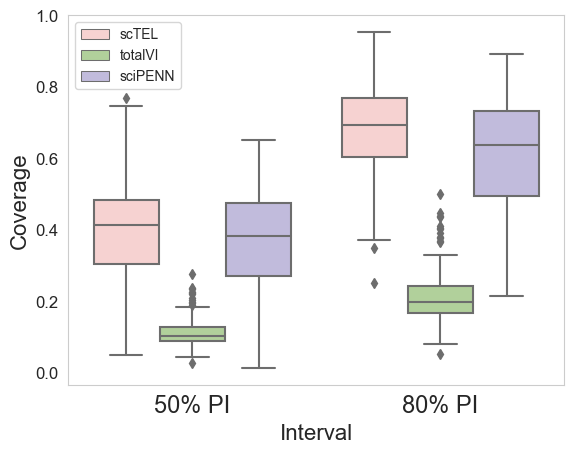

In [25]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(ax = ax, x = "Interval", y = "Coverage", hue = "Method", hue_order = ['scTEL', 'totalVI', 'sciPENN'], data = df, palette = ["#fccccb", "#b0d992", "#bdb5e1"])

Line, Label = ax.get_legend_handles_labels()
ax.legend(Line, Label, loc = 'upper left')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 17)
ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], fontsize = 12)
ax.set_xlabel(ax.get_xlabel(), size = 16)
ax.set_ylabel(ax.get_ylabel(), size = 16)
ax.figure.savefig('monocyte_fig/coverageprob.png',dpi=600)

# fig.savefig('monocyte_fig/coverageprob.png')